# Pipeline_GridSearchCV

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt

Rozważmy zbiór Breast Cancer

In [2]:
np.random.seed(1)
wine = datasets.load_wine()
# print description
# print(cancer.DESCR)

In [3]:
# get the data
X = wine.data
y = wine.target

Podzielmy zbiór na część testową i treningową .

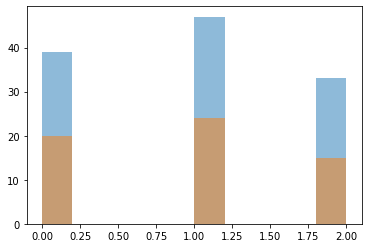

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

plt.hist(y_train, alpha=0.5)
plt.hist(y_test, alpha=0.5)
plt.show()

# Zadanie
Znajdż najleprzy model dzieląc na zbiór testowy i terningowy dla 

* SVM z jądrem rbf
* SVM z jądrem poly
* SVM liniowego
* Regresji logistycznej


In [7]:
from sklearn.model_selection import StratifiedKFold

seed=123
kfold = StratifiedKFold(n_splits=5)

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVC(kernel='rbf'))])

param_grid = {
            'preprocessing': [StandardScaler(), None],
            'classifier__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
            'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
}

grid_1 = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True)

grid_1.fit(X_train, y_train)
grid_1.best_params_

{'classifier__C': 1,
 'classifier__gamma': 0.01,
 'preprocessing': StandardScaler()}

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVC(kernel="linear"))])

param_grid = {
            'preprocessing': [StandardScaler(), None],
            'classifier__C': [0.001, 0.01, 0.1,1,10,100]
}

grid_2 = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True)

grid_2.fit(X_train, y_train)
grid_2.best_params_

{'classifier__C': 1, 'preprocessing': StandardScaler()}

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVC(kernel="poly"))])

param_grid = {
            'preprocessing': [StandardScaler()],
            'classifier__gamma': [0.001, 0.01, 0.1,1,10,100],
            'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
            'classifier__degree': [1,2,3,4],
            'classifier__coef0': [0.1, 0.01, 0.01]
}

grid_3 = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True)

grid_3.fit(X_train, y_train)
grid_3.best_params_

{'classifier__C': 0.01,
 'classifier__coef0': 0.1,
 'classifier__degree': 1,
 'classifier__gamma': 100,
 'preprocessing': StandardScaler()}

In [22]:
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', LogisticRegression())])

param_grid = {
            'preprocessing': [None, StandardScaler()],
            'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
            
}

grid_4 = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True)

grid_4.fit(X_train, y_train)
grid_4.best_params_

C:\Program Files\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Program Files\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

{'classifier__C': 100, 'preprocessing': StandardScaler()}

In [23]:
def heatmap(values, xlabel, ylabel, xticklabels, yticklabels, cmap=None,
            vmin=None, vmax=None, ax=None, fmt="%0.2f"):
    if ax is None:
        ax = plt.gca()
    # plot the mean cross-validation scores
    img = ax.pcolor(values, cmap=cmap, vmin=vmin, vmax=vmax)
    img.update_scalarmappable()
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xticks(np.arange(len(xticklabels)) + .5)
    ax.set_yticks(np.arange(len(yticklabels)) + .5)
    ax.set_xticklabels(xticklabels)
    ax.set_yticklabels(yticklabels)
    ax.set_aspect(1)

    for p, color, value in zip(img.get_paths(), img.get_facecolors(),
                               img.get_array()):
        x, y = p.vertices[:-2, :].mean(0)
        if np.mean(color[:3]) > 0.5:
            c = 'k'
        else:
            c = 'w'
        ax.text(x, y, fmt % value, color=c, ha="center", va="center")
    return img

In [24]:
import pandas as pd
# convert to DataFrame
results = pd.DataFrame(grid_1.cv_results_)
# show the first 5 rows
# display(results.head())

In [14]:
len(results.mean_test_score)

72

In [27]:
scores = np.array(results.mean_test_score).reshape(6, 6, 2)
scores = scores[:,:,0]
# plot the mean cross-validation scores
heatmap(scores, xlabel='classifier__gamma', xticklabels=param_grid['classifier__gamma'], ylabel='classifier__C', yticklabels=param_grid['classifier__C'], cmap="viridis")
plt.show()

scores = np.array(results.mean_test_score).reshape(6, 6, 2)
scores = scores[:,:,1]
# plot the mean cross-validation scores
heatmap(scores, xlabel='classifier__gamma', xticklabels=param_grid['classifier__gamma'], ylabel='classifier__C', yticklabels=param_grid['classifier__C'], cmap="viridis")
plt.show()

KeyError: 'classifier__gamma'

In [38]:
from sklearn import  metrics


models = []
models.append(('SVM rbf', grid_1.best_estimator_))
models.append(('SVM linear', grid_2.best_estimator_))
models.append(('SVM poly', grid_3.best_estimator_))
models.append(('logistic', grid_4.best_estimator_))



precision_score = []
recall_score = []
f1_score = []
accuracy_score = []
names = []
for name, model in models:
    print(name)
    names.append(name)
    print("R^2: {}".format(metrics.precision_score(y_test, model.predict(X_test), average='micro') ))
    print("recall_score: {}".format( metrics.recall_score(y_test, model.predict(X_test),average='micro') ))
    print("f1_score: {}".format( metrics.f1_score(y_test, model.predict(X_test),average='micro') ))
    print("accuracy_score: {}".format( metrics.accuracy_score(y_test, model.predict(X_test)) ))
    precision_score.append(metrics.precision_score(y_test, model.predict(X_test),average='micro'))
    recall_score.append(metrics.recall_score(y_test, model.predict(X_test),average='micro'))
    f1_score.append( metrics.f1_score(y_test, model.predict(X_test),average='micro'))
    accuracy_score.append(metrics.accuracy_score(y_test, model.predict(X_test)))

SVM rbf
R^2: 1.0
recall_score: 1.0
f1_score: 1.0
accuracy_score: 1.0
SVM linear
R^2: 0.9830508474576272
recall_score: 0.9830508474576272
f1_score: 0.9830508474576272
accuracy_score: 0.9830508474576272
SVM poly
R^2: 0.9830508474576272
recall_score: 0.9830508474576272
f1_score: 0.9830508474576272
accuracy_score: 0.9830508474576272
logistic
R^2: 0.9830508474576272
recall_score: 0.9830508474576272
f1_score: 0.9830508474576272
accuracy_score: 0.9830508474576272


In [40]:
import pandas as pd
d = {'precision_score': precision_score, 
     'recall_score': recall_score, 
     'f1_score': f1_score,
     'accuracy_score' : accuracy_score
    }
df = pd.DataFrame(data=d)
df.insert(loc=0, column='Method', value=names)
df

,Method,precision_score,recall_score,f1_score,accuracy_score
0,SVM rbf,1.000000,1.000000,1.000000,1.000000
1,SVM linear,0.983051,0.983051,0.983051,0.983051
2,SVM poly,0.983051,0.983051,0.983051,0.983051
3,logistic,0.983051,0.983051,0.983051,0.983051
